In [1]:
import pandas as pd

In [2]:
import string
import re
import numpy as np
import pandas as pd
from tensorflow import keras
%matplotlib inline
pd.set_option('display.max_colwidth', 200)
import matplotlib.pyplot as plt

2023-03-09 10:23:51.826509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import_df = pd.read_csv("ipatest.csv")
import_df = import_df.dropna()

In [5]:
ipa_array = np.array(import_df)

In [6]:
ipa_array[0:]

array([['hice', "'i-se"],
       ['combinación', "kom-bi-na-'si̯on"],
       ['inicio', "i-'ni-si̯o"],
       ['educación', "e-ðu-ka-'si̯on"],
       ['hasta', "'as-ta"],
       ['ojo', "'o-ho"],
       ['casi', "'ka-si"],
       ['usar', "u-'saɾ"],
       ['funcionar', "fun-si̯o-'naɾ"],
       ['cantar', "kan-'taɾ"],
       ['ayuda', "a-'ju-ða"],
       ['hombre', "'om-bɾe"],
       ['está', "es-'ta"],
       ['sabe', "'sa-βe"],
       ['oportunidad', "o-poɾ-tu-ni-'ðað"],
       ['toque', "'to-ke"],
       ['él', "'el"],
       ['su', "'su"],
       ['hermana', "eɾ-'ma-na"],
       ['esta', "'es-ta"],
       ['taza', "'ta-sa"],
       ['importante', "im-poɾ-'tan-te"],
       ['qué', "'ke"],
       ['el', "'el"],
       ['tanto', "'tan-to"],
       ['son', "'son"],
       ['masa', "'ma-sa"],
       ['diez', "'di̯es"],
       ['eso', "'e-so"],
       ['éxito', "'ek-si-to"],
       ['extra', "'eks-tɾa"],
       ['miedo', "'mi̯e-ðo"],
       ['voy', "'βoi̯"],
       ['leí', "le-'i"],
    

## In this dataset, the x axis is the Spanish word, the y axis is the ipa transcription with the accents and syllable breaks

## Let's get a better idea of what the string data actually looks like:

In [7]:
# first, let's grab one of the Spanish words
spanish_word = ipa_array[45][0]
print("Spanish Word: ", spanish_word)
for i,e in enumerate(spanish_word):
    print(i, e)

Spanish Word:  diario
0 d
1 i
2 a
3 r
4 i
5 o


In [8]:
# let's grab one of the IPA words
ipa_word = ipa_array[45][1]
print("IPA Word: ", ipa_word)
for i,e in enumerate(ipa_word):
    print(i,e)

IPA Word:  'di̯a-ɾi̯o
0 '
1 d
2 i
3 ̯
4 a
5 -
6 ɾ
7 i
8 ̯
9 o


## As we can see, the lengths are going to be different. Obviously, there is the addition of the syllable breaks (`-`) and the accent marks (`'`), but there is also the factor of the semi-vowel markings, which are being interpreted as new characters (` ̯`)

In [9]:
# lets test one more, just to see what it might look like
spanish_word2 = ipa_array[55][0]
print("Spanish Word: ", spanish_word2)
for i,e in enumerate(spanish_word2):
    print(i, e)

Spanish Word:  patrón
0 p
1 a
2 t
3 r
4 ó
5 n


In [10]:
ipa_word2 = ipa_array[55][1]
print("IPA Word: ", ipa_word2)
for i,e in enumerate(ipa_word2):
    print(i,e)

IPA Word:  pa-'tɾon
0 p
1 a
2 -
3 '
4 t
5 ɾ
6 o
7 n


# So it looks like the accented "o" (`ó`) is still read as a single character. This all is good information to know before moving forward

Max Span Len: 11
Max IPA Len: 16


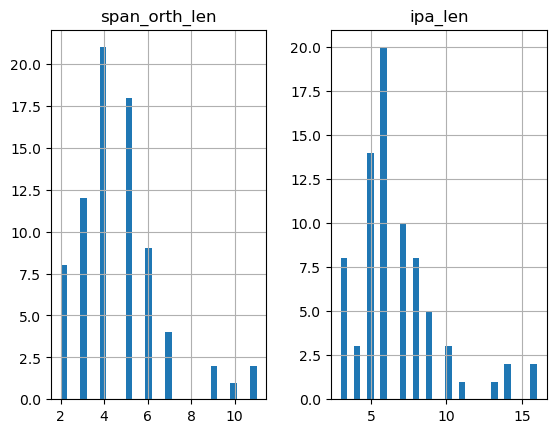

In [11]:
spanish_orth_len = [len(st) for st in ipa_array[:,0]]

ipa_len = [len(st) for st in ipa_array[:,1]]

print("Max Span Len: " + str(max(spanish_orth_len)))
print("Max IPA Len: " + str(max(ipa_len)))
    
length_df = pd.DataFrame({'span_orth_len':spanish_orth_len, 'ipa_len':ipa_len})

length_df.hist(bins = 30)
plt.show()

## In order for this type of data to work on the Keras framework, it needs to be presented as if each char is an individual word

In [12]:
spanish_lists = []
ipa_lists = []

for i in ipa_array[:]:
    # iterate through characters in spanish
    _span_str = i[0]
    # create empty list
    _span_list = []
    # iterate through spanish characters
    for x,e in enumerate(_span_str):
        _span_list.append(e)
      
    # iterate through characters in ipa
    _ipa_str = i[1]
    _ipa_list = []
    # iterate through ipa characters
    for x,e in enumerate(_ipa_str):
        _ipa_list.append(e)
        
    # create a new string where each word is a list
    spanish_spaces = " ".join(_span_list)
    spanish_lists.append(spanish_spaces)
    ipa_spaces = " ".join(_ipa_list)
    ipa_lists.append(ipa_spaces)
    
    
        

In [13]:
def merge(list1, list2):
     
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

In [14]:
ipa_list_tup = merge(spanish_lists, ipa_lists)
ipa_array_clean = np.array(ipa_list_tup)

In [15]:
ipa_array_clean

array([['h i c e', "' i - s e"],
       ['c o m b i n a c i ó n', "k o m - b i - n a - ' s i ̯ o n"],
       ['i n i c i o', "i - ' n i - s i ̯ o"],
       ['e d u c a c i ó n', "e - ð u - k a - ' s i ̯ o n"],
       ['h a s t a', "' a s - t a"],
       ['o j o', "' o - h o"],
       ['c a s i', "' k a - s i"],
       ['u s a r', "u - ' s a ɾ"],
       ['f u n c i o n a r', "f u n - s i ̯ o - ' n a ɾ"],
       ['c a n t a r', "k a n - ' t a ɾ"],
       ['a y u d a', "a - ' j u - ð a"],
       ['h o m b r e', "' o m - b ɾ e"],
       ['e s t á', "e s - ' t a"],
       ['s a b e', "' s a - β e"],
       ['o p o r t u n i d a d', "o - p o ɾ - t u - n i - ' ð a ð"],
       ['t o q u e', "' t o - k e"],
       ['é l', "' e l"],
       ['s u', "' s u"],
       ['h e r m a n a', "e ɾ - ' m a - n a"],
       ['e s t a', "' e s - t a"],
       ['t a z a', "' t a - s a"],
       ['i m p o r t a n t e', "i m - p o ɾ - ' t a n - t e"],
       ['q u é', "' k e"],
       ['e l', "' e l"],
       ['t

In [123]:
def tokenization(lines):
    # explicitly add filters to assure hyphens and apostrophes are not removed
    tokenizer = keras.preprocessing.text.Tokenizer(filters="-!'#$%&()*+,/:;<=>?@[\\]^_`{|}~\t\n")
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [124]:
span_orth_tokenizer = tokenization(ipa_array_clean[:, 0])
span_orth_vocab_size = len(span_orth_tokenizer.word_index) + 1

In [125]:
ipa_tokenizer = tokenization(ipa_array_clean[:, 1])
ipa_vocab_size = len(ipa_tokenizer.word_index) + 1

In [126]:
span_orth_tokenizer.word_index

{'a': 1,
 'e': 2,
 'o': 3,
 'r': 4,
 't': 5,
 'i': 6,
 'n': 7,
 's': 8,
 'l': 9,
 'c': 10,
 'u': 11,
 'd': 12,
 'm': 13,
 'h': 14,
 'p': 15,
 'y': 16,
 'í': 17,
 'b': 18,
 'é': 19,
 'ó': 20,
 'j': 21,
 'x': 22,
 'q': 23,
 'z': 24,
 'v': 25,
 'g': 26,
 'f': 27,
 'á': 28,
 'ú': 29}

In [127]:
ipa_tokenizer.word_index

{'a': 1,
 'e': 2,
 'o': 3,
 'i': 4,
 's': 5,
 't': 6,
 'ɾ': 7,
 'n': 8,
 '̯': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'u': 13,
 'ð': 14,
 'p': 15,
 'β': 16,
 'ʝ': 17,
 'h': 18,
 'd': 19,
 'r': 20,
 'b': 21,
 'w': 22,
 'f': 23,
 'j': 24,
 'ɣ': 25,
 'ŋ': 26,
 'g': 27}

In [128]:
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = keras.preprocessing.sequence.pad_sequences(seq, maxlen=length, padding='post')
         return seq

In [129]:
# break dataset into training and testing arrs
train, test = train_test_split(ipa_array_clean, test_size=0.2, random_state = 12)


In [130]:
span_length = max(spanish_orth_len)
ipa_length = max(ipa_len)

In [131]:
trainX = encode_sequences(span_orth_tokenizer, span_length, train[:, 1])
trainY = encode_sequences(ipa_tokenizer, ipa_length, train[:, 0])
#trainY = encode_output(trainY, span_orth_vocab_size)


In [132]:
# prepare validation data
testX = encode_sequences(span_orth_tokenizer, span_length, test[:, 1])
testY = encode_sequences(ipa_tokenizer, ipa_length, test[:, 0])
#testY = encode_output(testY, ipa_vocab_size)

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, RepeatVector
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras import optimizers
#tokenizer = keras.preprocessing.text.Tokenizer()

In [134]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

In [135]:
# model compilation
model = define_model(span_orth_vocab_size, ipa_vocab_size, span_length, ipa_length, 10)
rms = optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [136]:
filename = 'model.h1.2023-03-09-2'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [137]:
# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=10, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30
1/5 [=====>........................] - ETA: 11s - loss: 3.3315
Epoch 1: val_loss improved from inf to 1.51597, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 11s 2s/step - loss: 2.7278 - val_loss: 1.5160
Epoch 2/30
1/5 [=====>........................] - ETA: 0s - loss: 1.6226
Epoch 2: val_loss improved from 1.51597 to 1.15775, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 1.3648 - val_loss: 1.1577
Epoch 3/30
1/5 [=====>........................] - ETA: 0s - loss: 1.2639
Epoch 3: val_loss improved from 1.15775 to 1.04214, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 6s 2s/step - loss: 1.1436 - val_loss: 1.0421
Epoch 4/30
1/5 [=====>........................] - ETA: 0s - loss: 1.0016
Epoch 4: val_loss improved from 1.04214 to 0.95361, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 1.0319 - val_loss: 0.9536
Epoch 5/30
1/5 [=====>........................] - ETA: 0s - loss: 1.0585
Epoch 5: val_loss improved from 0.95361 to 0.94189, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.9975 - val_loss: 0.9419
Epoch 6/30
1/5 [=====>........................] - ETA: 0s - loss: 1.0652
Epoch 6: val_loss did not improve from 0.94189
5/5 [==============================] - 0s 14ms/step - loss: 0.9316 - val_loss: 0.9654
Epoch 7/30
1/5 [=====>........................] - ETA: 0s - loss: 0.9820
Epoch 7: val_loss improved from 0.94189 to 0.89693, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.9031 - val_loss: 0.8969
Epoch 8/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7998
Epoch 8: val_loss improved from 0.89693 to 0.88092, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 6s 2s/step - loss: 0.8987 - val_loss: 0.8809
Epoch 9/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8172
Epoch 9: val_loss did not improve from 0.88092
5/5 [==============================] - 0s 13ms/step - loss: 0.8497 - val_loss: 0.8869
Epoch 10/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7578
Epoch 10: val_loss did not improve from 0.88092
5/5 [==============================] - 0s 16ms/step - loss: 0.8224 - val_loss: 1.0609
Epoch 11/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8889
Epoch 11: val_loss did not improve from 0.88092
5/5 [==============================] - 0s 13ms/step - loss: 0.8840 - val_loss: 0.8813
Epoch 12/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6890
Epoch 12: val_loss improved from 0.88092 to 0.85019, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.8233 - val_loss: 0.8502
Epoch 13/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8352
Epoch 13: val_loss improved from 0.85019 to 0.84438, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 6s 2s/step - loss: 0.8058 - val_loss: 0.8444
Epoch 14/30
5/5 [==============================] - ETA: 0s - loss: 0.7845
Epoch 14: val_loss did not improve from 0.84438
5/5 [==============================] - 0s 21ms/step - loss: 0.7845 - val_loss: 0.9277
Epoch 15/30
1/5 [=====>........................] - ETA: 0s - loss: 0.9533
Epoch 15: val_loss improved from 0.84438 to 0.83348, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.7888 - val_loss: 0.8335
Epoch 16/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8955
Epoch 16: val_loss improved from 0.83348 to 0.82549, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.7860 - val_loss: 0.8255
Epoch 17/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8058
Epoch 17: val_loss improved from 0.82549 to 0.81772, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.7857 - val_loss: 0.8177
Epoch 18/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7413
Epoch 18: val_loss did not improve from 0.81772
5/5 [==============================] - 0s 14ms/step - loss: 0.7614 - val_loss: 0.8992
Epoch 19/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7750
Epoch 19: val_loss did not improve from 0.81772
5/5 [==============================] - 0s 12ms/step - loss: 0.7662 - val_loss: 0.8639
Epoch 20/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7793
Epoch 20: val_loss improved from 0.81772 to 0.81660, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 6s 2s/step - loss: 0.7693 - val_loss: 0.8166
Epoch 21/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8148
Epoch 21: val_loss improved from 0.81660 to 0.81148, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.7415 - val_loss: 0.8115
Epoch 22/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6991
Epoch 22: val_loss did not improve from 0.81148
5/5 [==============================] - 0s 17ms/step - loss: 0.7245 - val_loss: 0.8247
Epoch 23/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8723
Epoch 23: val_loss did not improve from 0.81148
5/5 [==============================] - 0s 13ms/step - loss: 0.7871 - val_loss: 0.8130
Epoch 24/30
1/5 [=====>........................] - ETA: 0s - loss: 0.5515
Epoch 24: val_loss did not improve from 0.81148
5/5 [==============================] - 0s 13ms/step - loss: 0.7353 - val_loss: 0.8271
Epoch 25/30
1/5 [=====>........................] - ETA: 0s - loss: 0.7556
Epoch 25: val_loss improved from 0.81148 to 0.80288, saving model to model.h1.2023-03-09-2


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


INFO:tensorflow:Assets written to: model.h1.2023-03-09-2/assets


5/5 [==============================] - 7s 2s/step - loss: 0.7229 - val_loss: 0.8029
Epoch 26/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6267
Epoch 26: val_loss did not improve from 0.80288
5/5 [==============================] - 0s 13ms/step - loss: 0.7484 - val_loss: 0.8113
Epoch 27/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6680
Epoch 27: val_loss did not improve from 0.80288
5/5 [==============================] - 0s 15ms/step - loss: 0.7256 - val_loss: 0.8154
Epoch 28/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6974
Epoch 28: val_loss did not improve from 0.80288
5/5 [==============================] - 0s 13ms/step - loss: 0.7160 - val_loss: 0.9550
Epoch 29/30
1/5 [=====>........................] - ETA: 0s - loss: 0.8443
Epoch 29: val_loss did not improve from 0.80288
5/5 [==============================] - 0s 12ms/step - loss: 0.7271 - val_loss: 0.8040
Epoch 30/30
1/5 [=====>........................] - ETA: 0s - loss: 0.6585
Epoch 30: 

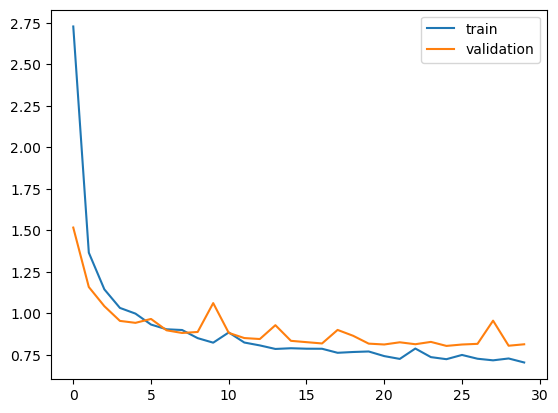

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [139]:
span_orth_tokenizer.word_index.items()

dict_items([('a', 1), ('e', 2), ('o', 3), ('r', 4), ('t', 5), ('i', 6), ('n', 7), ('s', 8), ('l', 9), ('c', 10), ('u', 11), ('d', 12), ('m', 13), ('h', 14), ('p', 15), ('y', 16), ('í', 17), ('b', 18), ('é', 19), ('ó', 20), ('j', 21), ('x', 22), ('q', 23), ('z', 24), ('v', 25), ('g', 26), ('f', 27), ('á', 28), ('ú', 29)])

In [140]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        print(word)
        print(index)
        if index == n:
            return word
        return None

In [141]:
model = load_model('model.h1.2023-03-09-2')
preds = model.predict(testX.reshape((testX.shape[0],testX.shape[1])))


2023-03-09 10:51:19.031699: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 10:51:19.042001: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 10:51:19.070360: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 10:51:19.079474: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 10:51:19.459368: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_sh

1/1 [==============================] - 2s 2s/step


In [142]:
preds

array([[[6.90059885e-02, 1.10048629e-01, 1.09735042e-01, ...,
         3.16492026e-03, 3.76951345e-03, 1.19902287e-02],
        [1.84084252e-01, 1.51881471e-01, 1.16648354e-01, ...,
         6.00997591e-04, 8.14438041e-04, 6.66261045e-03],
        [6.27965927e-01, 9.64658484e-02, 5.27063310e-02, ...,
         1.12082264e-04, 1.53598841e-04, 2.66505615e-03],
        ...,
        [9.94227648e-01, 1.21790788e-03, 8.03281670e-04, ...,
         3.31192109e-06, 6.93333413e-06, 4.55491027e-05],
        [9.94228959e-01, 1.21761870e-03, 8.03126488e-04, ...,
         3.31160959e-06, 6.93296670e-06, 4.55407389e-05],
        [9.94229674e-01, 1.21742976e-03, 8.03025963e-04, ...,
         3.31141950e-06, 6.93276024e-06, 4.55353002e-05]],

       [[2.79844292e-02, 1.09804720e-01, 1.17178485e-01, ...,
         1.84009585e-03, 2.44370778e-03, 8.80545005e-03],
        [3.87590900e-02, 1.50208950e-01, 1.38543382e-01, ...,
         3.52244126e-04, 5.82919805e-04, 4.67858184e-03],
        [1.12139709e-01, 

In [146]:
encoded_argmax  = np(preds, axis=1)
preds_text = ipa_tokenizer.sequences_to_texts(encoded_argmax)  

In [147]:
preds_text

['p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'a p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'a p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'a p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p',
 'p p p p p p p p p p p p p p p p p p p p p p p p p p p']

In [148]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})
pred_df

,actual,predicted
0,e s o,p p p p p p p p p p p p p p p p p p p p p p p p p p p
1,P a u l a,p p p p p p p p p p p p p p p p p p p p p p p p p p p
2,t r a e,p p p p p p p p p p p p p p p p p p p p p p p p p p p
3,u s a r,p p p p p p p p p p p p p p p p p p p p p p p p p p p
4,f u n c i o n a r,a p p p p p p p p p p p p p p p p p p p p p p p p p p p
5,h o y,p p p p p p p p p p p p p p p p p p p p p p p p p p p
6,d í a,p p p p p p p p p p p p p p p p p p p p p p p p p p p
7,o í,p p p p p p p p p p p p p p p p p p p p p p p p p p p
8,o p o r t u n i d a d,a p p p p p p p p p p p p p p p p p p p p p p p p p p p
9,e l,p p p p p p p p p p p p p p p p p p p p p p p p p p p
